<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#La-regression-lineaire" data-toc-modified-id="La-regression-lineaire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>La regression lineaire</a></span></li><li><span><a href="#Analyse-du-Dataset" data-toc-modified-id="Analyse-du-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse du Dataset</a></span><ul class="toc-item"><li><span><a href="#Vérification-des-valeurs-manquantes" data-toc-modified-id="Vérification-des-valeurs-manquantes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vérification des valeurs manquantes</a></span></li><li><span><a href="#Les-colonnes-existants" data-toc-modified-id="Les-colonnes-existants-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Les colonnes existants</a></span></li><li><span><a href="#Analyse-de-la-corrélation-entre-les-variables" data-toc-modified-id="Analyse-de-la-corrélation-entre-les-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analyse de la corrélation entre les variables</a></span></li></ul></li><li><span><a href="#Normalisation-du-data" data-toc-modified-id="Normalisation-du-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Normalisation du data</a></span><ul class="toc-item"><li><span><a href="#Creation-du-Theta" data-toc-modified-id="Creation-du-Theta-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creation du Theta</a></span></li><li><span><a href="#Modèle-Linéaire" data-toc-modified-id="Modèle-Linéaire-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modèle Linéaire</a></span></li><li><span><a href="#Fonction-coût-:-Erreur-Quadratique-Moyenne" data-toc-modified-id="Fonction-coût-:-Erreur-Quadratique-Moyenne-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fonction coût : Erreur Quadratique Moyenne</a></span></li><li><span><a href="#Gradients-et-Descente-de-Gradient" data-toc-modified-id="Gradients-et-Descente-de-Gradient-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradients et Descente de Gradient</a></span></li><li><span><a href="#Phase-d'entrainement" data-toc-modified-id="Phase-d'entrainement-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Phase d'entrainement</a></span></li><li><span><a href="#On-teste-pour-une-faible-correlation" data-toc-modified-id="On-teste-pour-une-faible-correlation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>On teste pour une faible correlation</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li></ul></div>

# La regression lineaire

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Analyse du Dataset

In [104]:
# import the data
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
df.shape

(150, 5)

In [106]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Vérification des valeurs manquantes

In [107]:
#df.duplicated()
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()))

sepal_length : False
sepal_width : False
petal_length : False
petal_width : False
class : False


## Les colonnes existants

In [108]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

## Analyse de la corrélation entre les variables

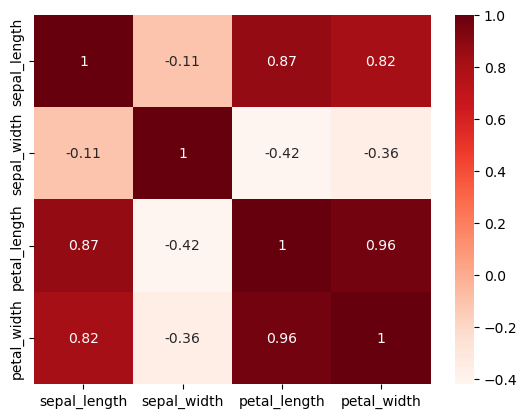

In [109]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

On remarque qu il ya une forte correlation entre TV est Sales avec valeur de 0.9 qui est proche de 1

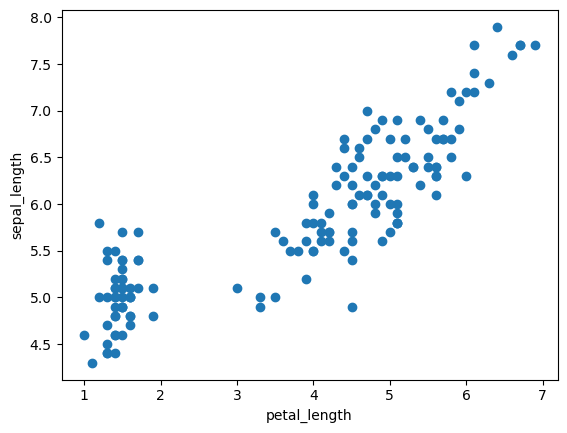

In [110]:
plt.scatter(df["petal_length"], df["sepal_length"])
plt.xlabel('petal_length')
plt.ylabel('sepal_length')
plt.show()

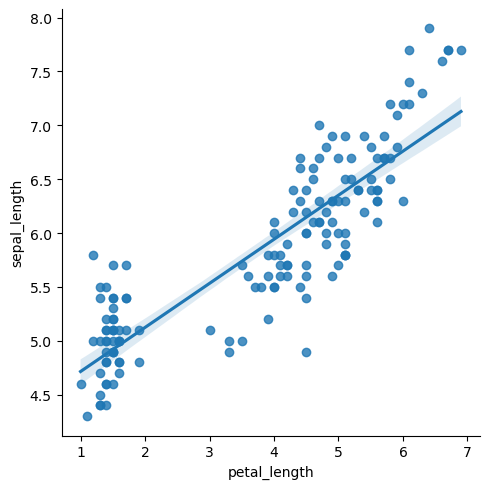

In [111]:
sns.lmplot(data=df, x='petal_length', y='sepal_length')

In [112]:
x, y = np.array(df["petal_length"]), np.array(df["sepal_length"])
x.shape, y.shape

((150,), (150,))

In [113]:
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [114]:
x.shape, y.shape

((150, 1), (150, 1))

# Normalisation du data

une variable centrée réduite est la variable transformée d'une variable aléatoire par une application affine, de telle sorte que sa moyenne soit nulle et son écart type égal à un.

- Cela équivaut à un changement d’unité, et n’a pas d’incidence sur les profils de variation.
- Les valeurs des coefficients de corrélation entre variables centrées réduites demeurent identiques à ce qu’elles étaient avant l’opération de centrage et réduction.

In [115]:
#crée une instance d'un objet de la classe StandardScaler de la bibliothèque scikit-learn 
scaler = StandardScaler()
x = scaler.fit_transform(x)

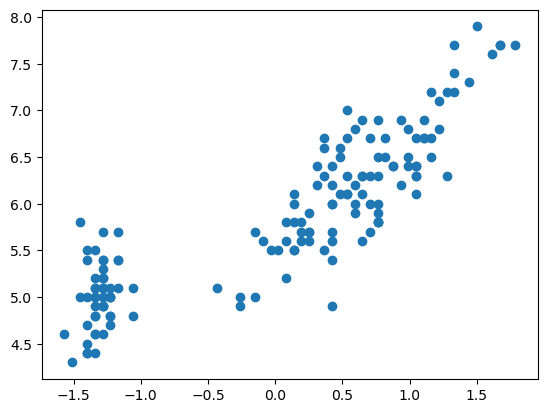

In [116]:
plt.scatter(x, y)

Création de la matrice X . Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [117]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(150, 2)

## Creation du Theta

 création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [118]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

##  Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.


In [119]:
def model(X, theta):
    return X.dot(theta)

## Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne

In [120]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [121]:
cost_function(X, y, theta)

15.44141980974769

##  Gradients et Descente de Gradient

On implémente la formule du gradient pour la MSE

Ensuite on utilise la fonction dans la descente de gradient:

In [122]:
def grad(X, y, theta):
    m = len(y)
    return  1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [123]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.1, n_iterations=1000)

In [124]:
theta_final.shape

(2, 1)

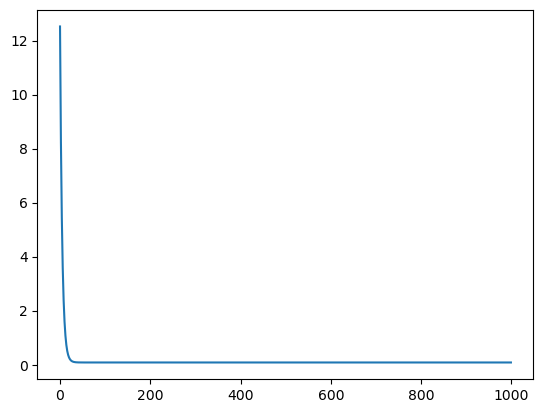

In [125]:
plt.plot(range(1000) ,cost_hist)

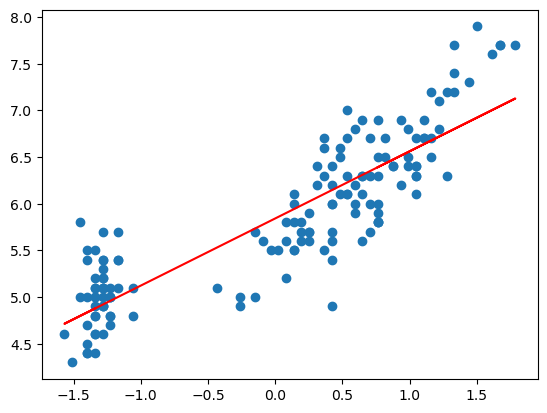

In [126]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [127]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [128]:
score = coef_determination(y, predictions)

In [129]:
score

0.7599553107783261

## On teste pour une faible correlation

Si on prend par exemple variable avec target de faible correlation.

On remarque que la courbe n est pas lineaire.

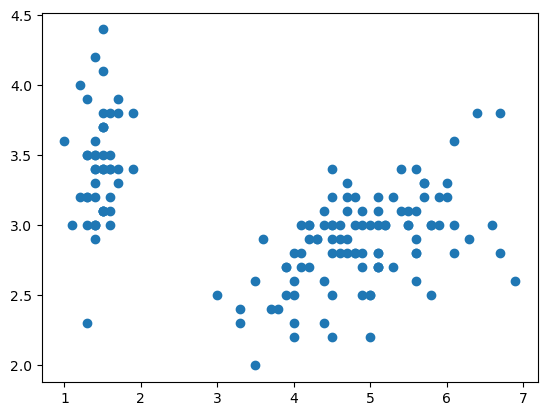

In [130]:
plt.scatter(df["petal_length"], df["sepal_width"])

In [131]:
x, y = np.array(df["petal_length"]), np.array(df["sepal_width"])
x.shape, y.shape

((150,), (150,))

In [132]:
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [133]:
x.shape, y.shape

((150, 1), (150, 1))

In [134]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

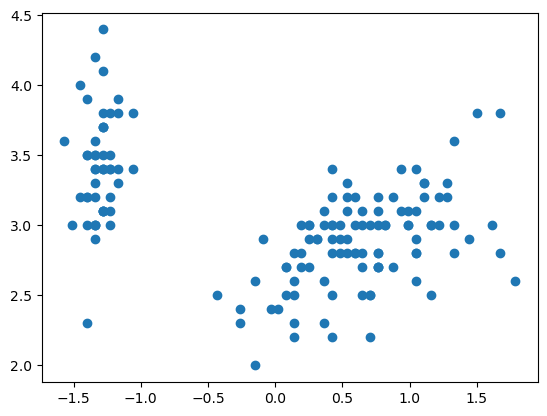

In [135]:
plt.scatter(x, y)

In [136]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(150, 2)

In [137]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.015, n_iterations=1000)

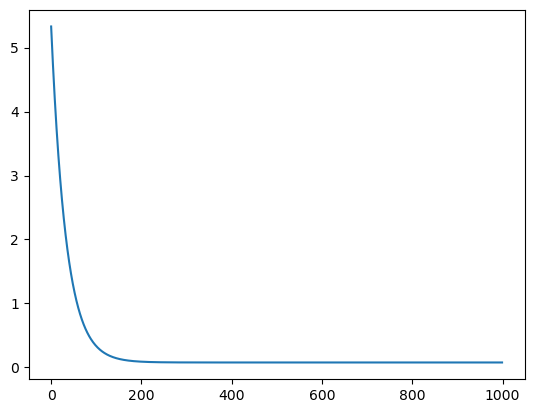

In [138]:
plt.plot(range(1000) ,cost_hist)

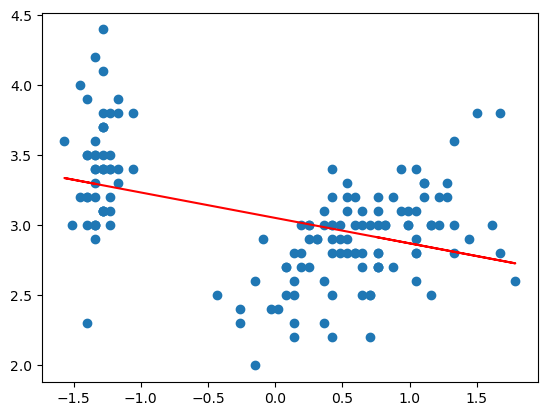

In [139]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [140]:
score = coef_determination(y, predictions)

In [141]:
score

0.17683378732814214